Product-wise Sales Summary:

      product     Category  total_price  revenue
0  Headphones  Electronics          150      150
1      Jacket      Apparel          200      200
2      Laptop  Electronics         1000     1000
3       Phone  Electronics          500      500
4       Shoes      Apparel          100      100


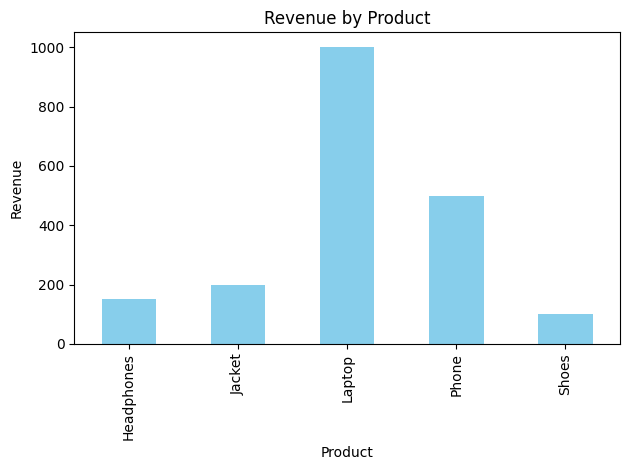

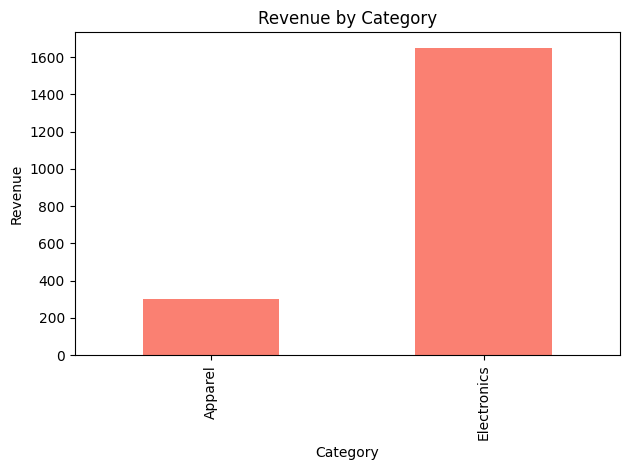

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create sales table if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    ProductID INT PRIMARY KEY,
    ProductName TEXT,
    Price DECIMAL(10, 2),
    Category TEXT
)
""")

# Step 3: Insert sample data (only if empty)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        (1, 'Laptop', 1000, 'Electronics'),
        (2, 'Phone', 500, 'Electronics'),
        (3, 'Shoes', 100, 'Apparel'),
        (4, 'Headphones', 150, 'Electronics'),
        (5, 'Jacket', 200, 'Apparel')
    ]
    cursor.executemany("INSERT INTO sales (ProductID, ProductName, Price, Category) VALUES (?, ?, ?, ?)", sample_data)
    conn.commit()

# Step 4: Run SQL query
query = """
SELECT ProductName AS product, Category, SUM(Price) AS total_price
FROM sales
GROUP BY ProductName, Category
"""
df = pd.read_sql_query(query, conn)

# Step 5: Add revenue (simulate quantity = 1 for each product)
df['revenue'] = df['total_price']  # Simplified if quantity is not tracked

# Step 6: Print DataFrame
print("Product-wise Sales Summary:\n")
print(df)

# Step 7: Plot revenue by Product
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart_by_product.png")
plt.show()

# Step 8: Plot revenue by Category
category_df = df.groupby("Category").sum(numeric_only=True).reset_index()
category_df.plot(kind='bar', x='Category', y='revenue', color='salmon', legend=False)
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.title("Revenue by Category")
plt.tight_layout()
plt.savefig("sales_chart_by_category.png")
plt.show()

# Close connection
conn.close()
